<a href="https://colab.research.google.com/github/mathrhino/pytorch/blob/main/torch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch 
from torchvision import datasets, transforms
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
batch_size=32
test_batch_size=32

In [11]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                   transform=transforms.Compose([
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean=(0.5),std=(0.5))
                   ])),
                   batch_size=batch_size,
                   shuffle=True
)

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw




Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [52]:
test_loader= torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
                   transform=transforms.Compose([
                                                 transforms.ToTensor(),
                                                 transforms.Normalize((0.5,),(0.5))
                   ])),
    batch_size=test_batch_size,
    shuffle=True
)

In [53]:
images, labels = next(iter(train_loader))

##pytorch와 tensor의 shape 순서의 의미가 다르다##
###[batch_size, channel, height, witdh]=Pytorch [batch_size, height, width, channel]= Tensorflow###

In [19]:
images.shape

torch.Size([32, 1, 28, 28])

In [20]:
labels.shape

torch.Size([32])

In [23]:
images[0].shape

torch.Size([1, 28, 28])

In [26]:
torch_image=torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [27]:
image=torch_image.numpy()
image.shape

(28, 28)

In [28]:
label=labels[0].numpy()

In [29]:
label.shape

()

In [30]:
label

array(4)

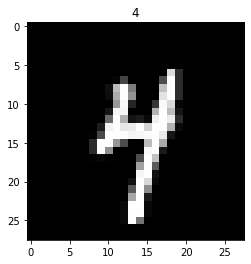

In [31]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()

In [32]:
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

##Layer Convolution##
###in_channels: 전달 받을 channel 수###
###out_channels: 전달 할 channel 수###
###kernel_size: kernel, weight의 사이즈###


In [33]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [34]:
layer=nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [40]:
weight= layer.weight
weight.shape 

torch.Size([20, 1, 5, 5])

In [41]:
weight=weight.detach().numpy()
#weight는 학습 가능한 상태이기 때문에 바로 numpy로 뽑아지지 않아서 detach_method를 사용하여 그래프에서 잠깐 제거하여 gradient 영향을 받지 않게


In [42]:
weight

array([[[[-0.11038437, -0.07611406,  0.16337772, -0.09818027,
           0.04355965],
         [ 0.00744591,  0.17024426, -0.1167345 , -0.18389943,
          -0.16877384],
         [ 0.04650993,  0.08451682,  0.0629906 ,  0.14564784,
          -0.12686646],
         [ 0.1962205 , -0.05253508, -0.191836  ,  0.0102684 ,
           0.18684123],
         [-0.01617095,  0.19732037,  0.17957957, -0.09016316,
           0.00384331]]],


       [[[ 0.05203359,  0.12471869,  0.06802797,  0.16241662,
          -0.00898874],
         [ 0.04698842, -0.08257499, -0.03292666,  0.06964868,
           0.11239958],
         [ 0.1644436 , -0.09027195,  0.04440379, -0.11241891,
           0.08861208],
         [-0.07443839, -0.1810478 , -0.07917068, -0.02276244,
          -0.196643  ],
         [ 0.01478765, -0.06947618, -0.05874617,  0.16543649,
          -0.19454165]]],


       [[[ 0.16789292, -0.124296  , -0.10803528,  0.10522721,
          -0.14563783],
         [-0.01009643,  0.14213417,  0.1902676

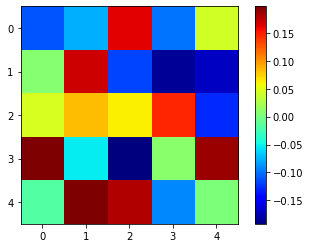

In [43]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [55]:
layer(image)

TypeError: ignored